# Classification with Unusual, Non-Linear Data

I recently discovered the sklearn.datasets package and, being the naturally curious person that I am, I'd like to see how different classification models perform with unusual, non-linear data.

I am going to measure accuracy (via repeated k-fold cross-validation) on the following models:
* Logistic Regression
* Naive Bayes
* KNearest Neighbors
* Support Vector Machines
* Decision Trees
* Random Forest
* Gradient Boosted Trees
* Multi-layer Perceptron, i.e. Neural Network


## The Circle Dataset

The sklearn.datasets package contains a make_circles function, which generates a large circle and smaller circle in 2-d.

Let's generate some data with the make_circles function!

Here are some imporant parameters:

* n_samples = the number of samples to generate
* noise = the standard deviation of the white noise added to the data
* random_state = the seed used for white noise generation
* factor = the scale factor between inner and outter circle.

Note: A smaller scale factor increases the distance between the inner and outter circle.

In [1]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=5000, noise = 0.1, random_state = 33, factor = 0.15)

A plot of the circle distance is shown below.

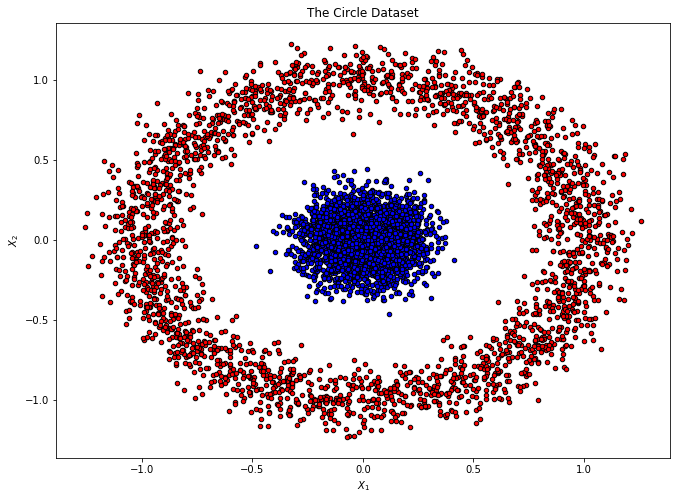

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = [11,8])
plt.title("The Circle Dataset")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

Doesn't look very hard for us humans to predict the label, now does it?

Before turning to the models, let me briefly mention the model selection method.

## Accuracy and Cross-validation

To determine how well the model is performing, I'll be measuring the model's accuracy. In binary classification, accuracy is defined to be the number of __true positives__ + the number of __true negatives__ over the sum of all observations, where true positives (true negatives) are correct predictions of the depdendent variable equal to 1 (0).

I'll import the cross_val_score function from the model_selection library. When evaluating models, I'll pass the string "accuracy" to the scoring parameter.

In [3]:
from sklearn.model_selection import cross_val_score

Now, I'll be measuring accuracy in the test folds of a K-Fold cross-validator. Specifically, I'll use repeated, stratified K-fold cross-validation with 5 folds and 10 repeats. The "stratified" part of repeated, stratified K-fold cross-validation means that data is separated into folds so that each fold has the same proportion of dependent variable's class. For example, if the data is 80% red points and 20% blue points and the color is the dependent variable, then each fold will have approximately 80% red and 20% blue points.

I'll import the cross-validator now.

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold

On to the models!

## Logistic Regression

[Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression) is a statistical model, assuming that the dependent variable, Y, is binomially distributed with a mean equal to a linear combination of the independent variables. The probability that Y takes on a certain value is the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) applied to a linear combination of the indepdent variables. Most software packages, including the Scikit-Learn library, use 0.5 as the cut-off score when making a prediction.

Let's see how Logistic Regression performs on the circle dataset.

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 33)
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Logistic Regression", cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.493820 (0.012731)


Let's see the results as a box plot.

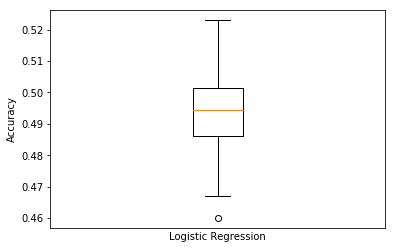

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Logistic Regression")
plt.ylabel("Accuracy")
plt.show()

This is not very good. If I were a betting man, I'd wager the opposite of whatever Logistic Regression is predicting.

## Naive Bayes

[Naive Bayes](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) is another statistical model, that 'naively' makes a strong assumption about the independence of the independent variables. In naive bayes, the probability of a certain class given the data is the product of the probability of that class and the probability of the indepndent variable given the class, for each independent variable.

The [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) function assumes that each independent variable, given a class, is normally distributed. 

Lastly, the predicted class is the class with maximum probability, even if all probabilties are tiny.

Let's see how Naive Bayes performs.

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Naive Bayes", cv_results.mean(), cv_results.std())
print(msg)

Naive Bayes: 0.989020 (0.003140)


Here's a boxplot of the results.

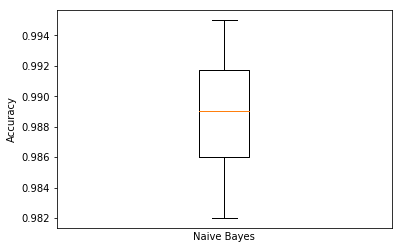

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Naive Bayes")
plt.ylabel("Accuracy")
plt.show()

This is much better than Logistic Regression. It would be premature to say we've found a winner, because we have quite a few more models to test.

## K Nearest Neighbors

[K Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) is an incredibly simple algorithm for making predictions. In K Nearest Neighbors, the most common class of the K nearest observations in the training data is used to make a prediction.

The [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) has 5 as the default value for K.

Let's check out K Nearest Neighbors.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("K Nearest Neighbors", cv_results.mean(), cv_results.std())
print(msg)

K Nearest Neighbors: 1.000000 (0.000000)


Here's the boxplot.

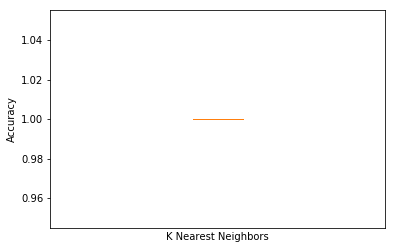

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("K Nearest Neighbors")
plt.ylabel("Accuracy")
plt.show()

We have a winner. Accuracy is 100% on all test folds.

Still, let's check out the other models.

## Support Vector Machines

The [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine) algorithm finds the linear combination of independent variables and weights that separate the dataset into hyperplanes with the widest margin between the classes. To handle non-linearity a [kernel](https://en.wikipedia.org/wiki/Kernel_method) function can be used to transform the feature space and make better predictions.

By default, the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) uses a radial-basis kernel function.

Time to test support vector machines.

In [11]:
from sklearn.svm import SVC
model = SVC()
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Support Vector Machine", cv_results.mean(), cv_results.std())
print(msg)

Support Vector Machine: 1.000000 (0.000000)


Another winner! Let's see that flat line of a boxplot.

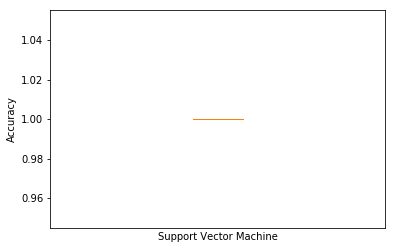

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Support Vector Machine")
plt.ylabel("Accuracy")
plt.show()

## Decision Trees

The [Decision Tree](https://en.wikipedia.org/wiki/Decision_tree) is a greedy algorithm that finds the variable and value that best splits the dataset in two, then splits the dataset and repeats until there are no more observations to split on or the tree has reached a maximum depth (or perhaps some other stopping condition). 

By default, the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) function uses [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity) to find the best variable and value to split on.

Let's check out the decision tree's performance on the circle dataset.

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Decision Tree", cv_results.mean(), cv_results.std())
print(msg)

Decision Tree: 0.997720 (0.001755)


Here's a boxplot of the test fold accuracies.

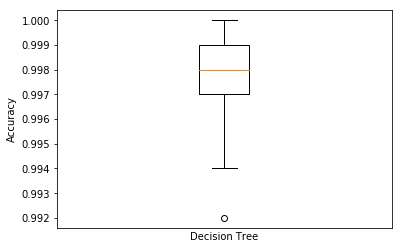

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Decision Tree")
plt.ylabel("Accuracy")
plt.show()

The decision tree isn't perfect, but at a 99.8% mean accuracy is much better than results from Logistic Regression.

Perhaps ensembles of trees will fair better?

## Random Forest

The [Random Forest](https://en.wikipedia.org/wiki/Random_forest) algorithm makes predictions with a majority vote from a collection of decision trees. To make sure that the decision trees aren't all the same, Random Forest samples the entire dataset with replacement each time a tree is grown. For even more variation, Random Forest also randomly selects independent variables when each tree is searching for the best variable and value to split on.

Let's see how Random Forest performs.

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 33)
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Random Forest", cv_results.mean(), cv_results.std())
print(msg)

Random Forest: 0.998700 (0.001473)


And here's the boxplot.

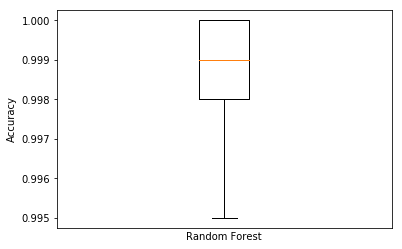

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Random Forest")
plt.ylabel("Accuracy")
plt.show()

Random Forest is slightly better than the single Decision Tree. At least one test fold had a 100% accuracy.

Still, there's another ensemble of trees we can test.

## Gradient Boosted Trees

[Gradient Boosting](https://en.wikipedia.org/wiki/Gradient_boosting) is a method for building a strong classifier from a series of weak classifiers. In gradient boosting, each additional classifier is fit to the model's _pseudo residuals_, then weighted and summed with the model's previous weak learners. Of course, I'm abstracting away and ignoring several key details.

In this test, I'll use Scikit-Learn's [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier).

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state = 33)
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Boosted Trees", cv_results.mean(), cv_results.std())
print(msg)

Boosted Trees: 0.999900 (0.000300)


Here's a boxplot of the test fold accuracies.

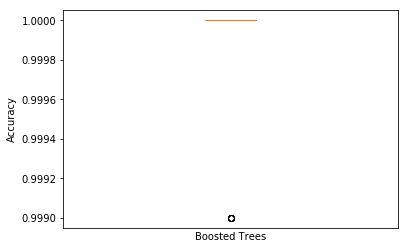

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Boosted Trees")
plt.ylabel("Accuracy")
plt.show()

All but one test fold had a 100% accuracy.

## Multi-layer Perceptron

The [Artificial Neural Network](https://en.wikipedia.org/wiki/Artificial_neural_network) model is also called the Multi-Layer Perceptron. Multi-Layer Perceptron, as the name implies, is composed of layers of the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) models. The analogy here is that the Perceptrons are like individual neurons in the brain, which is the Artificial Neural Network. There are tons of articles and tutorials on Neural Networks, so I won't go into details here.

I'll test Scikit-Learn's [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) with two hidden layers of size 8 and 4, and rectified linear unit (relu) [activation function](https://en.wikipedia.org/wiki/Activation_function).

In [19]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (8,4), random_state = 33, max_iter = 1000)
kfold = RepeatedStratifiedKFold(random_state = 33)
cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
msg = "%s: %f (%f)" % ("Neural Network", cv_results.mean(), cv_results.std())
print(msg)

Neural Network: 1.000000 (0.000000)


Here's that solid line boxplot.

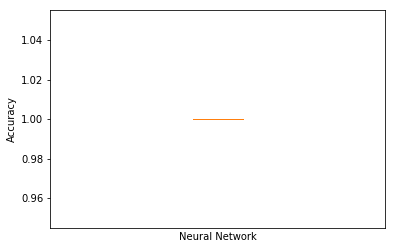

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(cv_results)
plt.xticks([], [])
plt.xlabel("Neural Network")
plt.ylabel("Accuracy")
plt.show()

Now, I'll admit that I had fiddled around with this function and changed the hidden_layer_sizes and max_iter parameters to get this result. Still, the purpose was just to show that this model can figure out the circle dataset.

## Conclusion

In this project I tested several models on a generated circle dataset. Here are my key findings:

* Logistic Regression performs very poorly at this task.
* Decision Trees, and Naive Bayes perform very well using default parameter settings.
* Gradient Boosted Trees is more accurate than Random Forest, which is more accurate than a single Decision Tree.
* Support Vector Machine (with a rbf kernel) and K-Nearest Neighbor easily achieve 100% accuracy on this dataset.
* Neural Networks can achieve 100% accuracy, but you'll have to fiddle around with the parameters.

As always, thanks for reading.